### CellData : FP densitogram

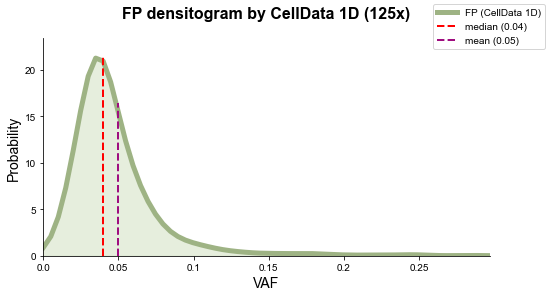

In [6]:
def visualization (vaf_list, **kwargs):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np
    import scipy.stats as kde

    matplotlib.rcParams["font.family"] ="arial"
    fig, ax = plt.subplots (figsize = (8, 4))
    #ax.set_yticks ( np.arange (0, np.max(y), 0.1))

    ax.set_title ( "FP densitogram by CellData 1D ({}x)".format(kwargs["DEPTH_MEAN"]), fontsize = 16, fontweight='bold', color='black', pad=20)

    x = np.linspace(0, 1, 200)
    kde_function = kde.gaussian_kde( vaf_list )
    y = kde_function(x) 

    ax.plot (x, y, label = "FP (CellData 1D)", linewidth = 5, color = '#9EB384')
    ax.fill_between(x, y, color='#CEDEBD', alpha=0.5)

    # median & mean
    ax.axvline(x = np.median (vaf_list),  ymin = 0, ymax = kde_function ( np.median(vaf_list) ) [0] / plt.ylim()[1]  * 0.97 , label = "median ({})".format ( round ( np.median(vaf_list), 2) ), linestyle='--', linewidth=2, color = 'red' )       
    ax.axvline(x = np.mean (vaf_list),  ymin = 0, ymax = kde_function ( np.mean(vaf_list) ) [0] / plt.ylim()[1]  , label = "mean ({})".format (round (np.mean (vaf_list), 2) ), linestyle='--', linewidth=2, color = '#9F0D7F' )       

    # 축 설정
    ax.set_xticks (  np.linspace (0, 1.01, 21) )
    ax.set_xticklabels (  np.round ( np.linspace (0, 1.01, 21), 2 ) )
    ax.set_xlabel("VAF", fontdict = {"fontsize" : 14})
    ax.set_ylabel("Probability", fontdict = {"fontsize" : 14})
    ax.axis ( [0, 0.3, 0, np.max (y) * 1.1] )

    # Spine 설정
    fig.gca().spines['top'].set_visible(False)
    fig.gca().spines['right'].set_visible(False)
    fig.legend()


if __name__ == "__main__":
    import numpy as np
    import os,re
    import pandas as pd

    kwargs = {"DEPTH_MEAN" : 125}
    DIR = "/data/project/Alzheimer/CLEMENT/01.INPUT_TSV/2.CellData/CellData_1D/" + str(kwargs["DEPTH_MEAN"]) + "x"

    vaf_list =  []


    for filename in sorted(os.listdir (DIR)):
        kwargs["SAMPLENAME"] = re.split(r'[_ .]', filename)[0]
        if os.path.isdir( DIR + "/" + filename ) == True:
            continue

        inputdf = pd.read_csv ( DIR + "/" + filename, sep = "\t", header = None)

        if inputdf.shape[1] == 3: #  If 4th column (BQ) is absent
            inputdf.columns = ["pos", "sample", "info"]
            inputdf.astype ({"pos":"str", "sample":"str", "info":"str"})
        elif inputdf.shape[1] == 4: #  If 4th column (BQ) is present
            inputdf.columns = ["pos", "sample", "info", "BQ"]
            inputdf.astype ({"pos":"str", "sample":"str", "info":"str", "BQ":"str"})

        for k in range (inputdf.shape[0]):
            depth = int ( inputdf.iloc[k]["info"].split(",")[0] ) 
            alt = int ( inputdf.iloc[k]["info"].split(",")[1] ) 
            vaf = round (alt / depth, 3) 

            if inputdf.iloc[k]["sample"] == "FP":
                vaf_list.append ( vaf )
            
        #print ( "{} : vaf_list = {}".format (kwargs ["SAMPLENAME"], len(vaf_list) ) )

    visualization ( np.array (vaf_list) , ** kwargs)

### CellData : VAF - FP probability (2023.08.04)

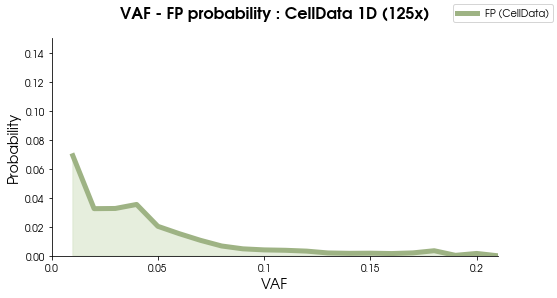

In [5]:
def visualization (vaf_fP_ratio, **kwargs):
    import matplotlib.pyplot as plt

    x = np.arange (0, 101, 1)
    y = np.array ( [ vaf_fp_ratio[i] for i in x] )

    fig, ax = plt.subplots (figsize = (8, 4))
    #ax.set_yticks ( np.arange (0, np.max(y), 0.1))

    ax.set_title ( "VAF - FP probability : CellData 1D ({}x)".format(kwargs["DEPTH_MEAN"]), fontsize = 16, fontweight='bold', color='black', pad=20)

    ax.plot (x, y, label = "FP (CellData)", linewidth = 5, color = '#9EB384')
    ax.fill_between(x, y, color='#CEDEBD', alpha=0.5)
    #ax.axvline(x = 0.02,  ymin = 0, ymax = TN_prior_cal (0.02)/plt.ylim()[1] * 1.03, label = "median", linestyle='--', linewidth=2, color = 'red' )

    # 축 설정
    ax.set_xticks (  np.arange (0, 101, 5) )
    ax.set_xticklabels (  np.round ( np.arange (0, 1.01, 0.05), 2 ) )
    ax.set_xlabel("VAF", fontdict = {"fontsize" : 14})
    ax.set_ylabel("Probability", fontdict = {"fontsize" : 14})
    ax.axis ( [0, 21, 0, 0.15] )

    # Spine 설정
    fig.gca().spines['top'].set_visible(False)
    fig.gca().spines['right'].set_visible(False)
    fig.legend()



if __name__ == "__main__":
    import numpy as np
    import os,re
    import pandas as pd

    kwargs = {"DEPTH_MEAN" : 125}
    DIR = "/data/project/Alzheimer/CLEMENT/01.INPUT_TSV/2.CellData/CellData_1D/" + str(kwargs["DEPTH_MEAN"]) + "x"

    vaf_cnt =  np.array([ [0, 0] ] * 101 )
    vaf_fp_ratio = [ [] ] * 101


    for filename in sorted(os.listdir (DIR)):
        kwargs["SAMPLENAME"] = re.split(r'[_ .]', filename)[0]
        #print ( kwargs ["SAMPLENAME"])
        if os.path.isdir( DIR + "/" + filename ) == True:
            continue

        inputdf = pd.read_csv ( DIR + "/" + filename, sep = "\t", header = None)

        if inputdf.shape[1] == 3: #  If 4th column (BQ) is absent
            inputdf.columns = ["pos", "sample", "info"]
            inputdf.astype ({"pos":"str", "sample":"str", "info":"str"})
        elif inputdf.shape[1] == 4: #  If 4th column (BQ) is present
            inputdf.columns = ["pos", "sample", "info", "BQ"]
            inputdf.astype ({"pos":"str", "sample":"str", "info":"str", "BQ":"str"})

        for k in range (inputdf.shape[0]):
            depth = int ( inputdf.iloc[k]["info"].split(",")[0] ) 
            alt = int ( inputdf.iloc[k]["info"].split(",")[1] ) 
            vaf = int ( np.round (alt / depth, 2) * 100 )

            if inputdf.iloc[k]["sample"] == "FP":
                vaf_cnt [vaf][0] = vaf_cnt [vaf][0] + 1
            else:
                vaf_cnt [vaf][1] = vaf_cnt [vaf][1] +  1

    for k in range (len (vaf_cnt)):
        if (vaf_cnt[k][0]  + vaf_cnt[k][1] ) == 0:
            vaf_fp_ratio[k] = np.nan
        else:
            if (vaf_cnt[k][0]  + vaf_cnt[k][1] ) < 200:
                vaf_fp_ratio[k] = np.nan
            else:
                vaf_fp_ratio[k] = vaf_cnt[k][0] / (vaf_cnt[k][0]  + vaf_cnt[k][1] )

    visualization (vaf_fp_ratio, **kwargs)

---

### SimData : VAF - FP probability (2023.08.03)

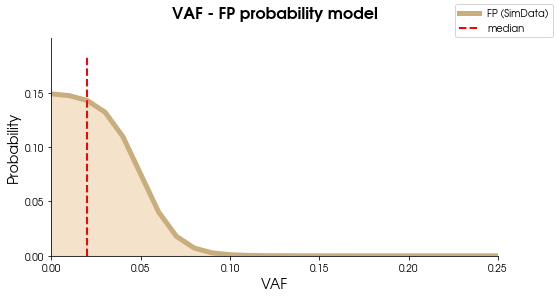

In [3]:
def TN_prior_cal(x):
    from scipy.special import expit
    return (1 - expit( 100*x - 5)) * 0.15

if __name__ == "__main__":
    import numpy as np
    import matplotlib
    matplotlib.rcParams["font.family"] = "URW Gothic"
    import matplotlib.pyplot as plt
    
    x = np.linspace(0, 1, 101)
    y = np.array ( [TN_prior_cal(i) for i in x] )

    fig, ax = plt.subplots (figsize = (8, 4))
    ax.set_yticks ( np.arange (0, np.max(y) * 1.1, 0.05))

    ax.set_title ( "VAF - FP probability model", fontsize = 16, fontweight='bold', color='black', pad=20)

    ax.plot (x, y, label = "FP (SimData)", linewidth = 5, color = '#C8AE7D')
    ax.fill_between(x, y, color='#EAC696', alpha=0.5)
    ax.axvline(x = 0.02,  ymin = 0, ymax = TN_prior_cal (0.02)/plt.ylim()[1] , label = "median", linestyle='--', linewidth=2, color = 'red' )

    # 축 설정
    ax.set_xlabel("VAF", fontdict = {"fontsize" : 14})
    ax.set_ylabel("Probability", fontdict = {"fontsize" : 14})
    ax.axis ( [0, 0.25, 0, 0.2] )

    # Spine 설정
    fig.gca().spines['top'].set_visible(False)
    fig.gca().spines['right'].set_visible(False)
    fig.legend()

### SimData : FP densitogram (2023.08.03)


======================	1.SimData_2D/n500_100x/decoy/0.0	===============================

======================	1.SimData_2D/n500_100x/decoy/0.1	===============================

======================	1.SimData_2D/n500_100x/lump/0.0	===============================

======================	1.SimData_2D/n500_100x/lump/0.1	===============================


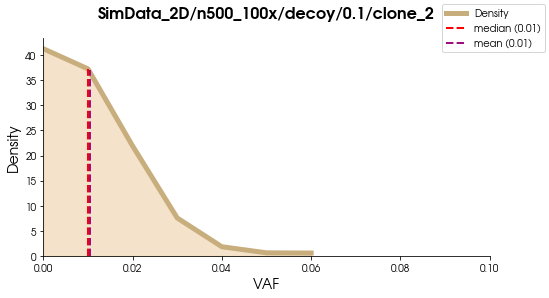

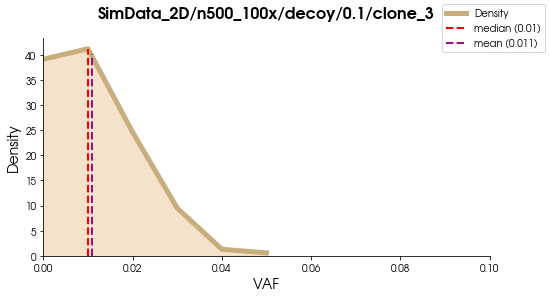

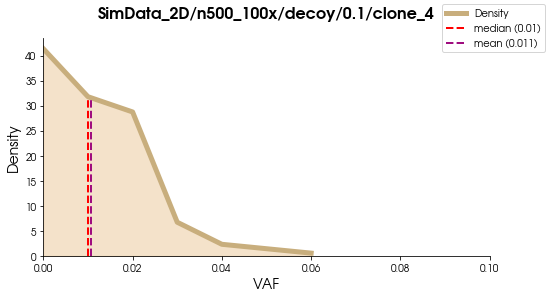

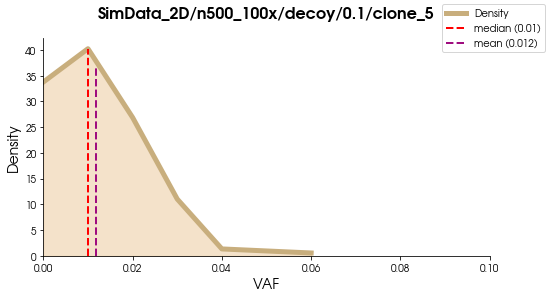

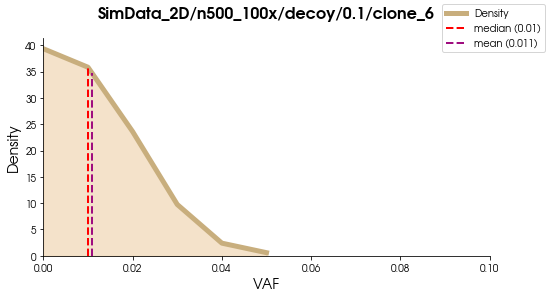

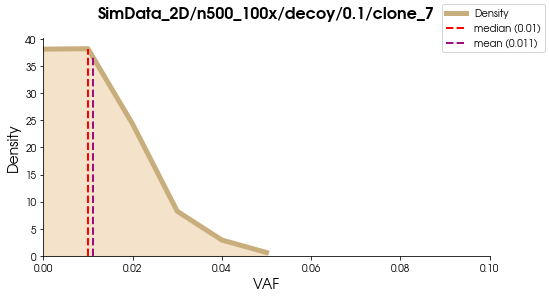

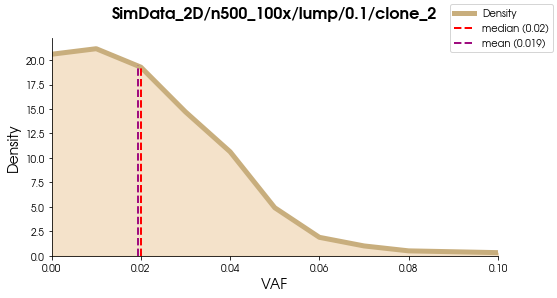

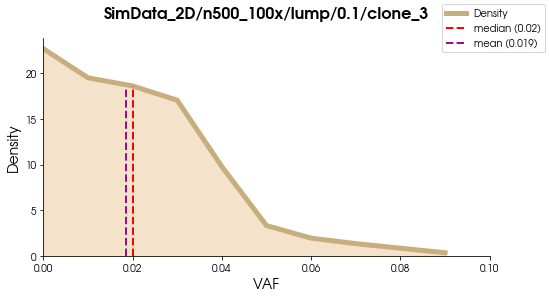

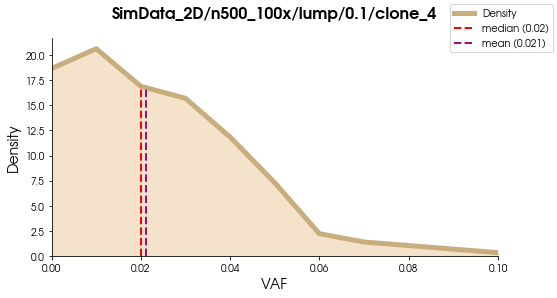

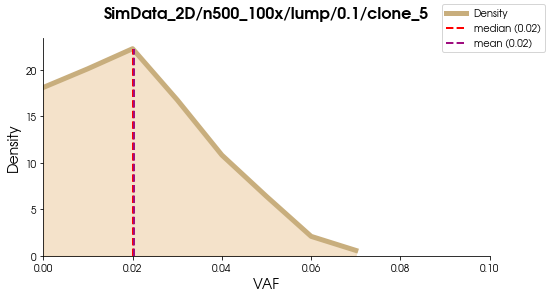

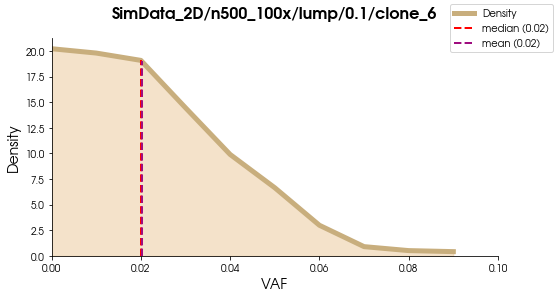

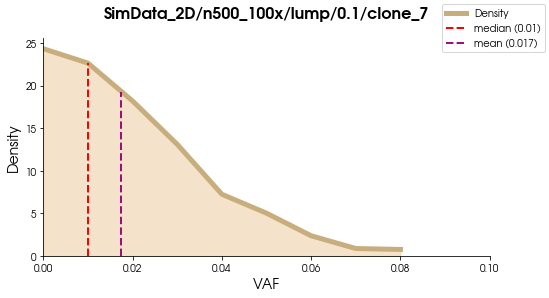

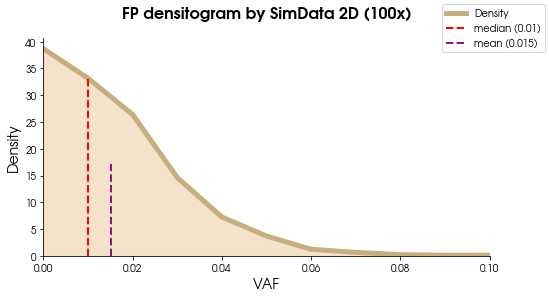

In [12]:
def draw_fp_densitogram (x, TITLE):
    import numpy as np
    from scipy.stats import gaussian_kde
    import matplotlib
    matplotlib.rcParams["font.family"] = "URW Gothic"
    import matplotlib.pyplot as plt

    if len (x) != 0:           # FP = 0 이고 비어있으면 아예 densitogram 안됨
        x = sorted ( np.array (x) )
        kde_function = gaussian_kde( x )
        y = kde_function (x)


        fig, ax = plt.subplots (figsize = (8, 4))
        #ax.set_yticks ( np.arange (0, np.max(y), 0.1))

        ax.set_title ( TITLE, fontsize = 16, fontweight='bold', color='black', pad=20)

        ax.plot (x, y, label = "Density", linewidth = 5, color = '#C8AE7D')
        ax.fill_between(x, y, color = '#EAC696', alpha=0.5)
        ax.axvline(x = np.median (x),  ymin = 0, ymax = kde_function ( np.median(x) ) [0] / plt.ylim()[1] , label = "median ({})".format ( round ( np.median(x), 3) ), linestyle='--', linewidth=2, color = 'red' )       
        ax.axvline(x = np.mean (x),  ymin = 0, ymax = kde_function ( np.mean(x) ) [0] / plt.ylim()[1]  , label = "mean ({})".format (round (np.mean (x), 3) ), linestyle='--', linewidth=2, color = '#9F0D7F' )       

        # 축 설정
        ax.set_xlabel("VAF", fontdict = {"fontsize" : 14})
        ax.set_ylabel("Density", fontdict = {"fontsize" : 14})
        ax.axis ( [0, 0.1, 0, np.max (y) * 1.05] )

        # Spine 설정
        fig.gca().spines['top'].set_visible(False)
        fig.gca().spines['right'].set_visible(False)
        fig.legend()




if __name__ == "__main__":    
    import os
    import pandas as pd

    kwargs = {}

    NUM_BLOCK_LIST = [2]             # 1, 2, 3
    NUM_MUTATION_LIST = [500]    # 500, 100
    DEPTH_MEAN_LIST = [100]       # 100, 30
    FP_RATIO_LIST = [0.0, 0.1 ]        # 0.0, 0.1
    SIMDATA_LIST = [ "decoy", "lump"] # "decoy", "lump"
    NUM_CLONE_LIST = [ 2, 3, 4, 5, 6, 7 ]      # 2, 3, 4, 5, 6, 7
    BENCHMARK_LIST = [0, 1, 2]; kwargs["BENCHMARK_START"] = BENCHMARK_LIST[0];  kwargs["BENCHMARK_END"] = BENCHMARK_LIST[1]

    x_total = []
    for NUM_BLOCK in NUM_BLOCK_LIST:
        for NUM_MUTATION in NUM_MUTATION_LIST:
            for DEPTH_MEAN in DEPTH_MEAN_LIST:        
                for SIMDATA in SIMDATA_LIST:
                    for FP_RATIO in FP_RATIO_LIST:
                        print("\n======================\t1.SimData_{}D/n{}_{}x/{}/{}\t===============================".format( NUM_BLOCK ,NUM_MUTATION, DEPTH_MEAN, SIMDATA, FP_RATIO ))            
                        for NUM_CLONE in NUM_CLONE_LIST:
                            x_regional = []
                            for ii in range(kwargs["BENCHMARK_START"],  kwargs["BENCHMARK_END"] + 1):
                                kwargs["NPVAF_DIR"] = "/data/project/Alzheimer/CLEMENT/02.npvaf/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN)  + "x/" + str(SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE) + "/" +  str(ii) + "/npvaf.txt"
                                npvaf = pd.read_csv (kwargs["NPVAF_DIR"], sep = "\t",  index_col = 0  )
                                npvaf = npvaf [ npvaf["membership_answer"] == "FP"]
                                for i in range (NUM_BLOCK):
                                    x_regional = x_regional +  list ( npvaf.iloc[:, i] ) 
                                    x_total = x_total +  list ( npvaf.iloc[:, i] ) 
                            draw_fp_densitogram (x_regional, TITLE = "SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN)  + "x/" + str(SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE) )
    
    draw_fp_densitogram (x_total, TITLE = "FP densitogram by SimData {}D ({}x)".format ( NUM_BLOCK_LIST[0], DEPTH_MEAN_LIST[0]) )
                                